In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from mlp import model




train_label = pd.read_csv('/Users/hongseoklee/VSCodeWorkspace/AIs/NCSoft/final_data/train/train_label.csv')
print(train_label)


train_activity = pd.read_csv('/Users/hongseoklee/VSCodeWorkspace/AIs/NCSoft/final_data/train/train_activity.csv')
print(train_activity)


                                                  acc_id     label
0      b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...      week
1      ed500c4957956b3e99dc3985666850b582f812405eefb6...      week
2      acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...      week
3      34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...      week
4      26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...      week
...                                                  ...       ...
99995  da6d33b03968d8e35821f6eb88ad22e12e37aa8867084e...  retained
99996  676c944f4b6ae63818b3cad824a61233690f16a2275d5d...  retained
99997  695e1f28e234fc4cc53085e332fa7a76d7895ca4cc745b...  retained
99998  0c87fabaad5542e533f958a1d6fd739993b94e95e00989...  retained
99999  47ff575cb94019df5695c5d81ec285b0d801607b2a8697...  retained

[100000 rows x 2 columns]
        wk                                             acc_id  cnt_dt  \
0        7  3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...       4   
1        8  3dc6f2875dc

In [10]:
df = pd.merge(left = train_label , right = train_activity, how = "inner", on = "acc_id")



# 원하는 라벨 순서 정의
label_mapping = {'week':0, 'month':1, '2month':2, 'retained':3}

# 데이터프레임 열에 매핑 적용
df['label'] = df['label'].map(label_mapping)


categorical_features = ["acc_id"]
# for문을 사용하여 Label Encoding 적용
label_encoder = LabelEncoder()
for column in categorical_features:
    df[column] = label_encoder.fit_transform(df[column])


# 결과 출력



train_x = df.drop(labels = ["label", "acc_id"], axis = 1)
train_y = df["label"]


columns = train_x.columns

#print(train_x)

print(train_x.shape)

selected_features = ['item_hongmun', 'party_chat', 'cnt_dt', 'npc_hongmun', 'whisper_chat', 'wk', 'cnt_use_buffitem', 'get_money', 'quest_hongmun', 'guild_chat', 'game_combat_time', 'play_time']
train_x = train_x[selected_features]


#검증 데이터셋 추출
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)


model.fit(train_x, train_y, epochs=5, batch_size=32, validation_split=0.2)

# 훈련된 모델을 사용하여 검증 세트 예측
y_pred = model.predict(val_x)

y_pred = list(map(int, y_pred))
y_pred = [min(x, 3) for x in y_pred]
y_pred = [max(x, 0) for x in y_pred]

(440323, 37)
Epoch 1/5
8807/8807 [==============================] - 5s 573us/step - loss: 0.6430 - accuracy: 0.2835 - val_loss: 0.6533 - val_accuracy: 0.2785
Epoch 2/5
8807/8807 [==============================] - 5s 557us/step - loss: 0.6404 - accuracy: 0.2833 - val_loss: 0.6420 - val_accuracy: 0.2867
Epoch 3/5
8807/8807 [==============================] - 5s 574us/step - loss: 0.6376 - accuracy: 0.2841 - val_loss: 0.6378 - val_accuracy: 0.2857
Epoch 4/5
8807/8807 [==============================] - 5s 568us/step - loss: 0.6358 - accuracy: 0.2842 - val_loss: 0.6342 - val_accuracy: 0.2865
Epoch 5/5
2753/2753 [==============================] - 1s 254us/step


In [11]:
# 분류 보고서 출력
print('Classification Report:')
print(classification_report(val_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.69      0.64     15358
           1       0.34      0.43      0.38     19432
           2       0.24      0.53      0.33     19815
           3       0.88      0.02      0.04     33460

    accuracy                           0.34     88065
   macro avg       0.51      0.42      0.35     88065
weighted avg       0.56      0.34      0.28     88065



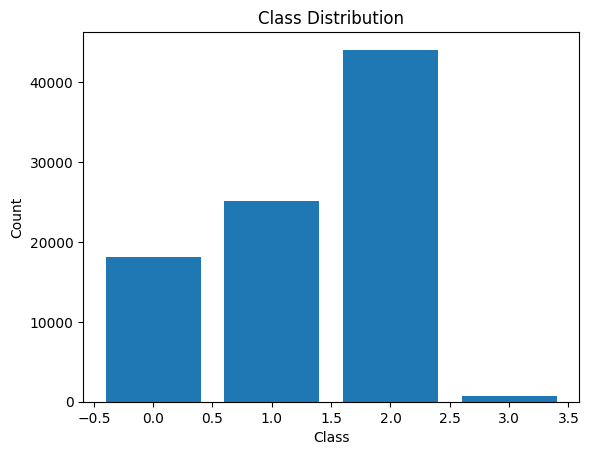

In [12]:
# 클래스 레이블과 개수 추출
labels = list(set(y_pred))  # 중복을 제거한 클래스 레이블 리스트
counts = [y_pred.count(label) for label in labels]  # 각 클래스별 개수 계산

# 막대 그래프 생성
plt.bar(labels, counts)

# 그래프에 레이블 추가
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# 그래프 표시
plt.show()